In [46]:
import os

path = "/Users/abdiqalaqmohamed/Desktop/Data- Association/Data"
os.listdir(path)


['.DS_Store', 'Groceries_dataset.csv']

In [47]:
import pandas as pd

path = "/Users/abdiqalaqmohamed/Desktop/Data- Association/Data"

df = pd.read_csv(path + "/Groceries_dataset.csv")
df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Data Cleaning 


In [50]:
# Drop missing values (if any)
df = df.dropna()



In [48]:
# Remove duplicates
df = df.drop_duplicates()


In [51]:
# STEP 2 — Convert data to Transaction List Format
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()



- Each Member_number + Date = one shopping basket.

In [53]:
# STEP 3 — One-Hot Encode (Basket Format)
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

basket = pd.DataFrame(te_array, columns=te.columns_)
basket.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- Apriori requires one-hot encoded data, where each item is a column and each row represents a transaction.
- TransactionEncoder converts transactions into a boolean matrix.
- basket is the resulting transaction-item matrix:
True → item is present in the transaction
False → item is absent

- Each row = one transaction
- Each column = an item
- True/False = whether the item was purchased in that basket


# Frequent Itemset Mining (Apriori + FP-Growth)

In [19]:
# import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt


In [57]:
# perform apriori algorithm
#Frequent itemsets using Apriori — support 0.01

from mlxtend.frequent_patterns import apriori

# Apriori with two different support thresholds


frequent_1 = apriori(basket, min_support=0.01, use_colnames=True)
frequent_1.sort_values("support", ascending=False).head(10)




,support,itemsets
62,0.157923,(whole milk)
40,0.122101,(other vegetables)
46,0.110005,(rolls/buns)
52,0.097106,(soda)
63,0.085879,(yogurt)
47,0.069572,(root vegetables)
57,0.067767,(tropical fruit)
5,0.060683,(bottled water)
49,0.060349,(sausage)
15,0.053131,(citrus fruit)


- We use the Apriori algorithm from mlxtend to find frequent itemsets.
min_support=0.01 filters out itemsets appearing in less than 1% of transactions.
use_colnames=True ensures item names appear instead of column indices.
- Sorting by support helps identify the top frequent items.

In [58]:
frequent_5 = apriori(basket, min_support=0.05, use_colnames=True)
frequent_5.sort_values("support", ascending=False).head(10)


,support,itemsets
9,0.157923,(whole milk)
2,0.122101,(other vegetables)
4,0.110005,(rolls/buns)
7,0.097106,(soda)
10,0.085879,(yogurt)
5,0.069572,(root vegetables)
8,0.067767,(tropical fruit)
0,0.060683,(bottled water)
6,0.060349,(sausage)
1,0.053131,(citrus fruit)


In [65]:
# using fpgrowth algorithm
from mlxtend.frequent_patterns import fpgrowth
import time
start_time = time.time()

frequent_fpgrowth = fpgrowth(basket, min_support=0.01, use_colnames=True)

end_time = time.time()
fpgrowth_time = end_time - start_time

print(f"FP-Growth found {len(frequent_fpgrowth)} frequent itemsets in {fpgrowth_time:.2f} seconds")
frequent_fpgrowth.sort_values('support', ascending=False).head(10)



FP-Growth found 69 frequent itemsets in 0.34 seconds


,support,itemsets
0,0.157923,(whole milk)
15,0.122101,(other vegetables)
11,0.110005,(rolls/buns)
8,0.097106,(soda)
1,0.085879,(yogurt)
22,0.069572,(root vegetables)
18,0.067767,(tropical fruit)
29,0.060683,(bottled water)
2,0.060349,(sausage)
43,0.053131,(citrus fruit)


In [67]:
# compare performance
import time
from mlxtend.frequent_patterns import apriori, fpgrowth

# --- Apriori ---
start_time = time.time()

frequent_apriori = apriori(basket, min_support=0.01, use_colnames=True)

end_time = time.time()
apriori_time = end_time - start_time

print(f"Apriori runtime: {apriori_time:.4f} seconds")
print(f"Apriori found {len(frequent_apriori)} frequent itemsets")

# --- FP-Growth ---
start_time = time.time()

frequent_fpgrowth = fpgrowth(basket, min_support=0.01, use_colnames=True)

end_time = time.time()
fpgrowth_time = end_time - start_time

print(f"FP-Growth runtime: {fpgrowth_time:.4f} seconds")
print(f"FP-Growth found {len(frequent_fpgrowth)} frequent itemsets")



Apriori runtime: 0.1082 seconds
Apriori found 69 frequent itemsets
FP-Growth runtime: 0.1330 seconds
FP-Growth found 69 frequent itemsets


- Both algorithms found 69 frequent itemsets with min_support=0.01.
Top 10 items are identical for both:
- The results are identical, meaning both algorithms reliably identify frequent itemsets.
- n this small dataset, Apriori is slightly faster than FP-Growth.
- For larger datasets, FP-Growth generally outperforms Apriori because it avoids generating all candidate itemsets.
- Both algorithms are consistent in frequent itemsets discovery, but FP-Growth is more scalable.

- Frequent items like whole milk, vegetables, rolls/buns, and yogurt can be used to design cross-promotions or combo deals.
- Choice of algorithm (Apriori vs FP-Growth) matters for runtime efficiency in large retail datasets.

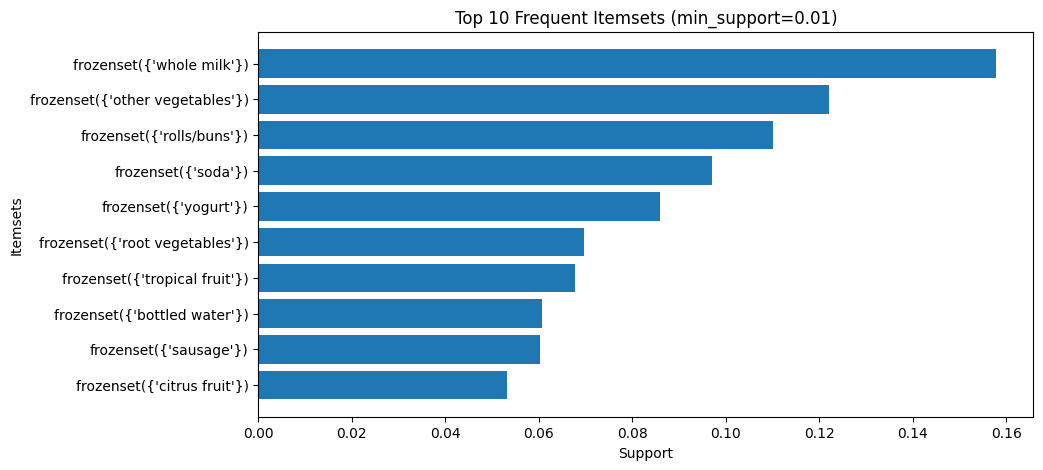

In [60]:
import matplotlib.pyplot as plt

top10 = frequent_low.sort_values("support", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.barh(top10['itemsets'].astype(str), top10['support'])
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.title("Top 10 Frequent Itemsets (min_support=0.01)")
plt.gca().invert_yaxis()
plt.show()


# Association Rule


In [64]:
from mlxtend.frequent_patterns import association_rules

# Use frequent itemsets with lower support (0.01)
rules = association_rules(frequent_low, metric="confidence", min_threshold=0.1)  # 10% confidence

# Sort by lift
rules = rules.sort_values('lift', ascending=False)

# Display top 10 rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
3,(yogurt),(whole milk),0.011161,0.129961,0.822940
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
2,(soda),(whole milk),0.011629,0.119752,0.758296


- 82.3% of transactions with yogurt also include whole milk. Lift < 1 means slightly less likely than random chance.
- 12.7% of transactions with rolls/buns also include whole milk. Lift < 1 → weak positive association.
- 12.2% of transactions with other vegetables also include whole milk. Slightly lower than expected by chance.
- 12% of transactions with soda also include whole milk. Lift < 1 → weak association.

### Analyze rules using confidence, lift, and support metrics.

- Support → fraction of all transactions containing both antecedent and consequent.
- Confidence → P(consequent | antecedent).
Lift → measures how much more likely the consequent is bought with the antecedent compared to random chance:
Lift > 1 → strong positive association
Lift = 1 → independent
Lift < 1 → items are purchased together less than expected

- Yogurt → Whole milk has 82% confidence, meaning 82% of transactions with yogurt also include whole milk.
- Rolls/buns → Whole milk has only 12.7% confidence, a weaker relationship.
- Confidence helps identify how reliably the antecedent predicts the consequent.

- Support tells you how common the combination is in all transactions.
- Confidence tells you how often the consequent appears when the antecedent occurs.
- Lift tells you the strength of the association relative to random chance.

## Top 3 Interesting Association Rules
Antecedent	Consequent	Support	Confidence	Lift	Real-World Interpretation

yogurt	whole milk	0.0112	0.823	0.823	Customers who buy yogurt very often also buy whole milk. This suggests that yogurt and whole milk are complementary items for breakfast or dairy purchases.

rolls/buns	whole milk	0.0140	0.127	0.804	
Some customers purchase rolls/buns along with whole milk, possibly for breakfast or lunch preparation. Though the association is weaker, it indicates occasional pairing.

other vegetables	whole milk	0.0148	0.122	0.769	Customers buying vegetables sometimes also buy whole milk, perhaps because they are planning balanced meals or cooking with milk-based sauces.

- Rule 1 (yogurt → whole milk): Could inform cross-promotions, e.g., place yogurt and milk nearby in stores.
- Rule 2 (rolls/buns → whole milk): Suggests occasional combo purchases; could design breakfast bundle deals.
- Rule 3 (other vegetables → whole milk): Shows customers planning meals might buy dairy and vegetables together; could help meal-kit suggestions or discounts.

